In [1]:
from tqdm import tqdm
import os
from copy import deepcopy
import pickle
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.transforms import Compose
from datasets.ascad_datasets import AscadDataset, RandomShift, RandomNoise
from models.resnet_1d import resnet18
from models.cnn import EffNetDS50
from training.single_model import train_step, eval_step
from training.common import execute_epoch
from display_results import plot_traces

In [2]:
model = EffNetDS50((1, 700), (256,))
print(model)

EffNetDS50(
  (feature_extractor): Sequential(
    (0): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
    (1): SELU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (4): Conv1d(32, 64, kernel_size=(25,), stride=(1,), padding=(12,))
    (5): SELU()
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): AvgPool1d(kernel_size=(25,), stride=(25,), padding=(0,))
    (8): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (9): SELU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): AvgPool1d(kernel_size=(4,), stride=(4,), padding=(0,))
  )
  (fc): Sequential(
    (0): Linear(in_features=384, out_features=15, bias=True)
    (1): SELU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): SELU()
    (4): Linear(in_features=15, out_features=15, bias=True)
    (5): 

In [3]:
epochs_per_trial = 150
device = 'cuda'
results_path = os.path.join('.', 'results', 'disc_hparam_sweep')

hparams_to_sweep = {
    'dataset_kwargs': [
        {'transform': RandomShift(), 'traces_per_sample': val} for val in range(1, 6)
    ],
    'weight_decay': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'dropout': [0, 1e-3, 1e-2, 1e-1, 5e-1],
    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
}

#hparams_to_sweep = {
#    'dataset_kwargs': [
#        {'transform': RandomShift(max_shift_size=0), 'mixup': False},
#        {'transform': RandomShift(), 'mixup': False},
#        {'transform': Compose((RandomNoise(), RandomShift(max_shift_size=0))), 'mixup': False},
#        {'transform': RandomShift(max_shift_size=0), 'mixup': True},
#        {'transform': Compose((RandomShift(), RandomNoise())), 'mixup': False},
#        {'transform': RandomShift(), 'mixup': True},
#        {'transform': Compose((RandomNoise(), RandomShift(max_shift_size=0))), 'mixup': True},
#        {'transform': Compose((RandomShift(), RandomNoise())), 'mixup': True}
#    ]
#}

#hparams_to_sweep = {
#    'learning_rate': [1e-3, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2],
#    'weight_decay': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
#    'dropout': [0, 1e-3, 1e-2, 1e-1, 5e-1],
#    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}

In [4]:
#class LossFn:
#    def __init__(self):
#        self.bce_loss = nn.BCELoss()
#    def __call__(self, logits, target):
#        prediction = nn.functional.softmax(logits, dim=-1)
#        if target.shape != prediction.shape:
#            target = nn.functional.one_hot(target, num_classes=256).to(torch.float)
#        loss = self.bce_loss(prediction, target)
#        return loss

LossFn = nn.CrossEntropyLoss
from torch.optim.lr_scheduler import OneCycleLR as LRScheduler

Starting new dataset_kwargs trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:28<00:00, 12.97s/it]

Done. Min rank: 83.08229999999998
	New best min rank. Previous best: inf


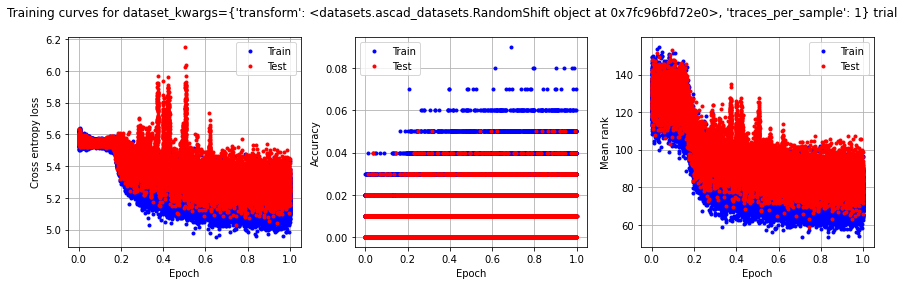







Starting new dataset_kwargs trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:30<00:00, 12.92s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:29<25:34, 13.58s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [17:17<16:40, 13.52s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [26:06<07:54, 13.56s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [34:00<00:00, 13.53s/it]

Done. Min rank: 87.1191


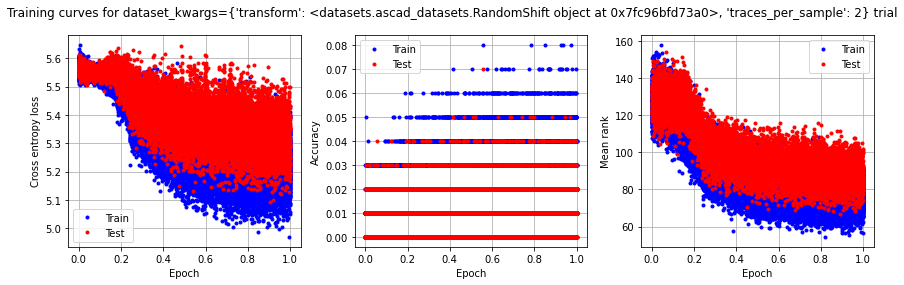







Starting new dataset_kwargs trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [35:20<00:00, 14.12s/it]

Done. Min rank: 98.30879999999999


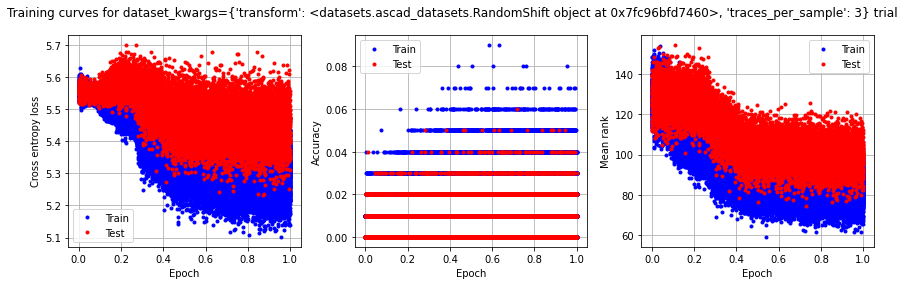







Starting new dataset_kwargs trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [35:22<00:00, 14.06s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [09:05<27:24, 14.55s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [18:32<17:56, 14.54s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [27:58<08:27, 14.49s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [36:27<00:00, 14.55s/it]

Done. Min rank: 100.7542


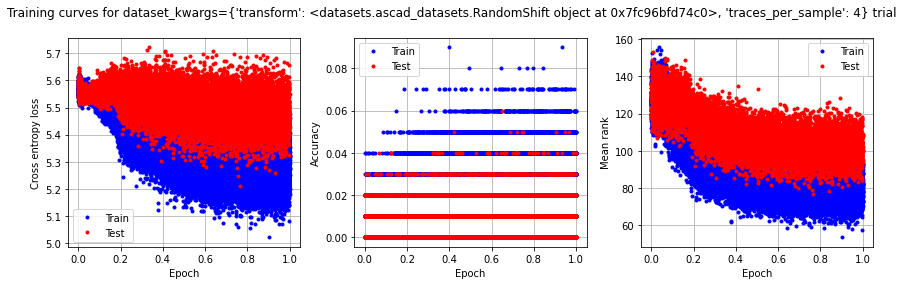







Starting new dataset_kwargs trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [37:41<00:00, 15.02s/it]

Done. Min rank: 102.57639999999999


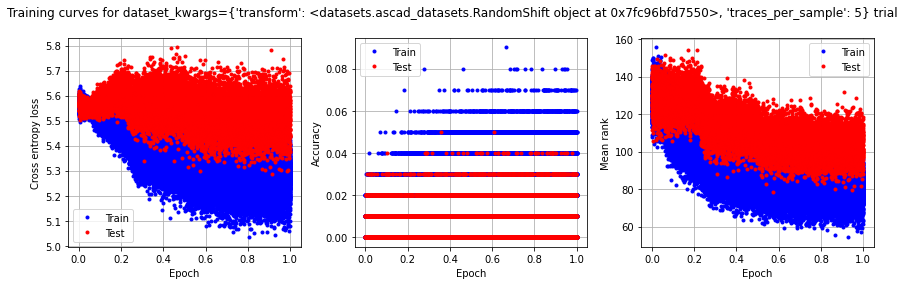







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [37:43<00:00, 14.99s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:06<24:24, 12.96s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:32<15:58, 12.95s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [24:58<07:34, 12.97s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:32<00:00, 13.00s/it]

Done. Min rank: 83.99779999999998
	New best min rank. Previous best: inf


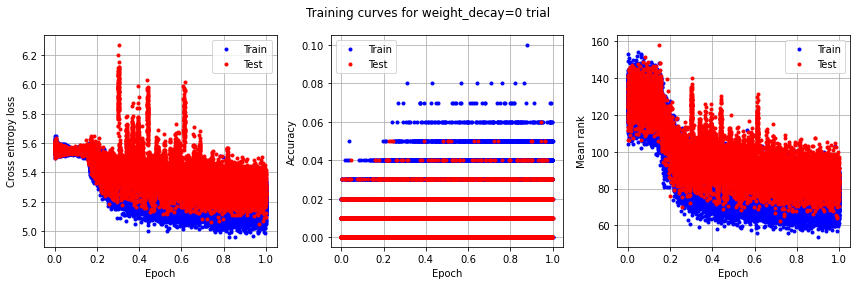







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 1e-06
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:33<00:00, 12.95s/it]

Done. Min rank: 84.73710000000001


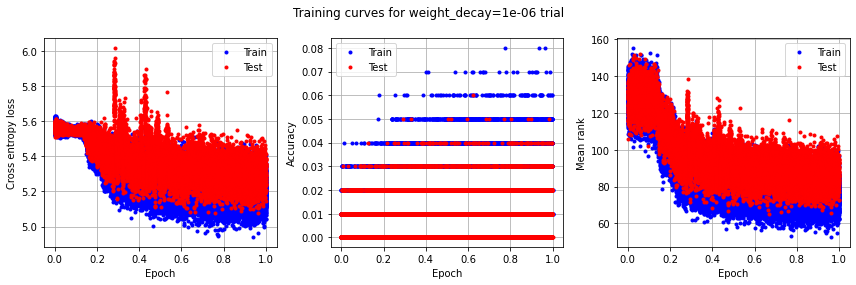







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 1e-05
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:35<00:00, 12.95s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:06<24:26, 12.97s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:33<16:02, 13.00s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [25:00<07:34, 12.98s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:34<00:00, 12.98s/it]

Done. Min rank: 85.37799999999999


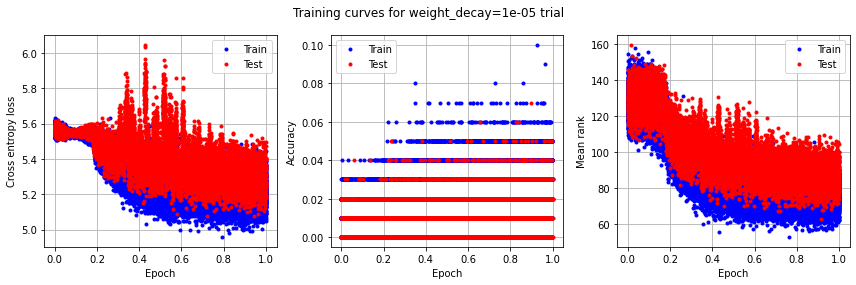







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 0.0001
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:34<00:00, 13.00s/it]

Done. Min rank: 88.74889999999998


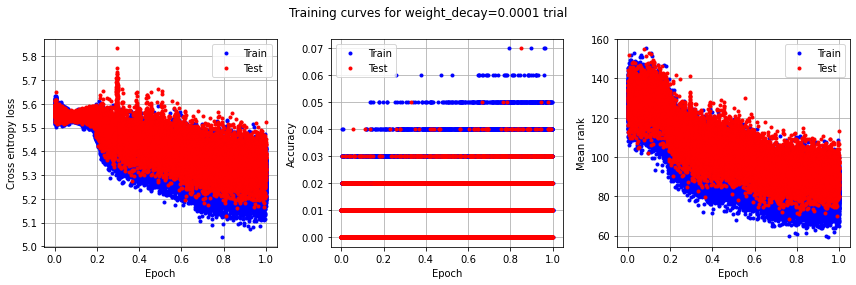







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 0.001
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:36<00:00, 12.96s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:07<24:30, 13.01s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:34<15:59, 12.97s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [25:00<07:34, 12.99s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:35<00:00, 13.00s/it]

Done. Min rank: 125.4108


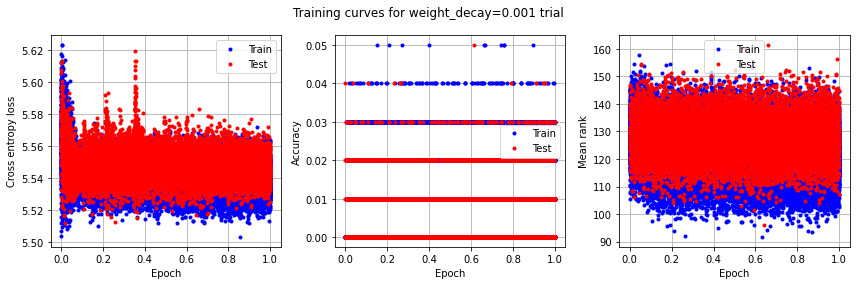







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 0.01
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:39<00:00, 13.03s/it]

Done. Min rank: 126.65660000000001


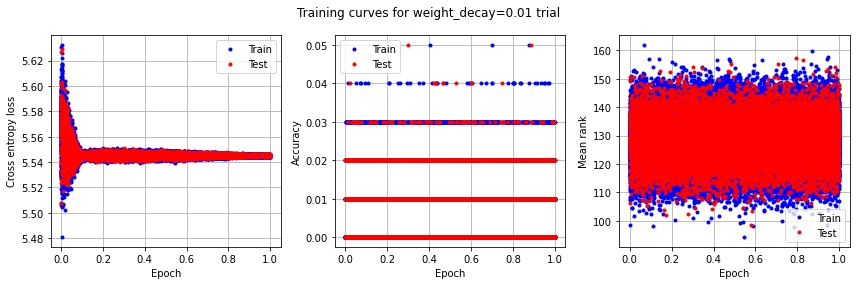







Starting new weight_decay trial...
	Learning rate: 1e-05
	Weight decay: 0.1
	Dropout: 0
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:40<00:00, 12.99s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:07<24:25, 12.97s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:33<16:01, 13.00s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [25:00<07:36, 13.03s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:35<00:00, 13.04s/it]

Done. Min rank: 126.50150000000002


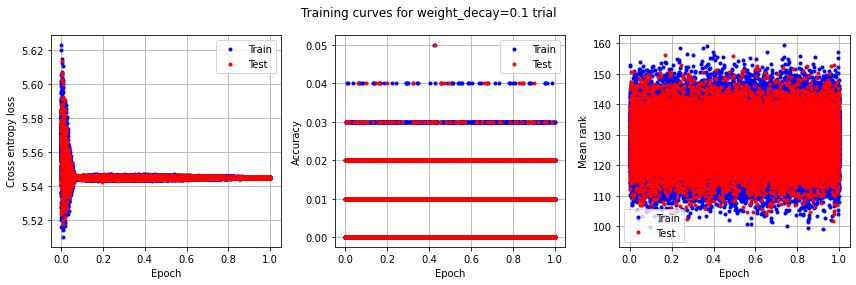







Starting new dropout trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:31<00:00, 12.94s/it]

Done. Min rank: 84.21789999999999
	New best min rank. Previous best: inf


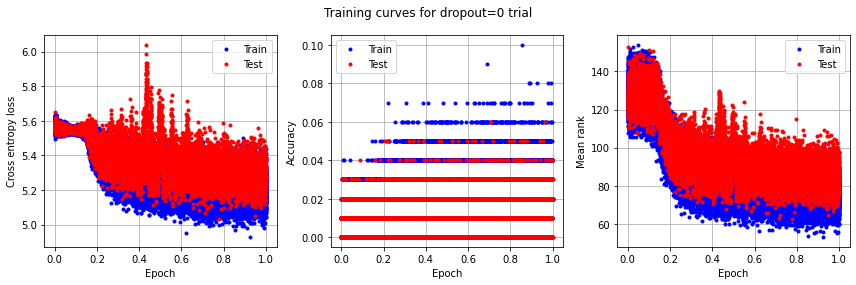







Starting new dropout trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.001
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:33<00:00, 12.93s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:06<24:24, 12.96s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:31<15:59, 12.97s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [24:57<07:34, 12.99s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:32<00:00, 12.99s/it]

Done. Min rank: 83.49449999999999
	New best min rank. Previous best: 84.21789999999999


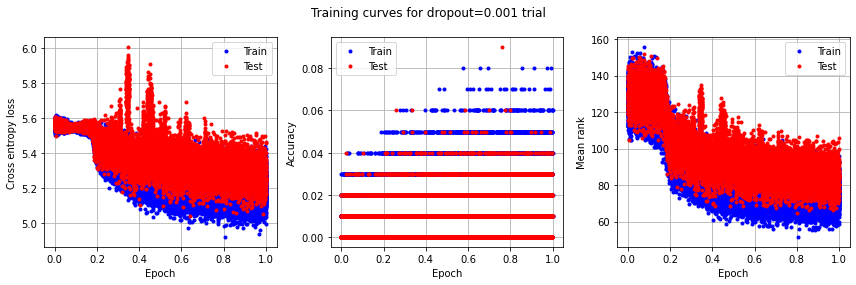







Starting new dropout trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.01
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:34<00:00, 13.01s/it]

Done. Min rank: 84.12799999999999


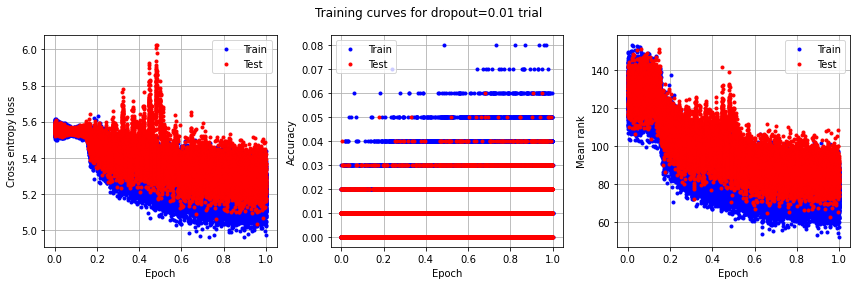







Starting new dropout trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.1
	Batch size: 100



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:36<00:00, 12.96s/it]

 25%|██████████████████████████████████████████▎                                                                                                                             | 38/151 [08:06<24:25, 12.97s/it]


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 77/151 [16:32<15:58, 12.95s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 116/151 [24:58<07:35, 13.01s/it]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:32<00:00, 12.98s/it]

Done. Min rank: 85.0473


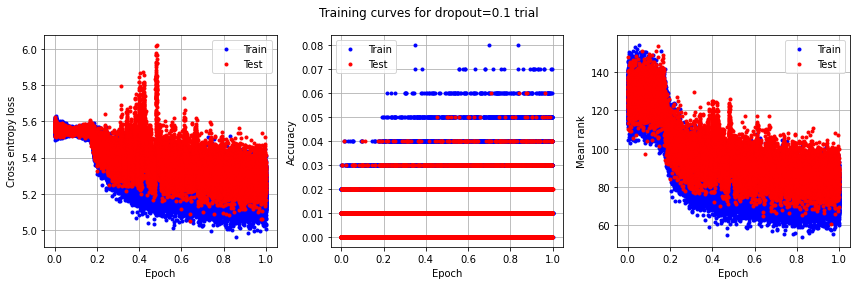







Starting new dropout trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.5
	Batch size: 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:30<00:00, 12.98s/it]

Done. Min rank: 84.546


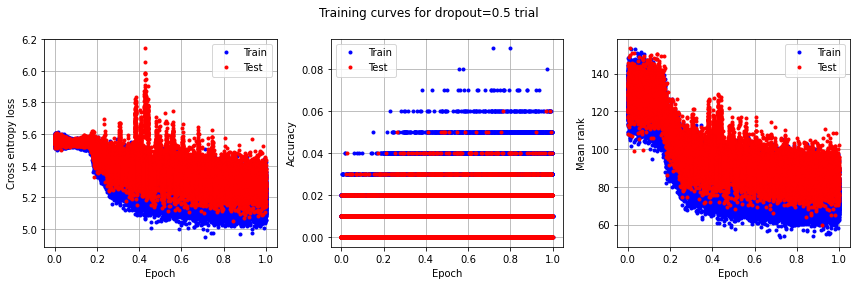







Starting new batch_size trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.001
	Batch size: 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [32:32<00:00, 12.93s/it]

 25%|█████████████████████████████████████████                                                                                                                          | 38/151 [1:53:25<5:44:56, 183.16s/it]


 51%|███████████████████████████████████████████████████████████████████████████████████                                                                                | 77/151 [3:52:08<3:45:56, 183.19s/it]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 116/151 [5:50:27<1:46:45, 183.03s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [7:36:58<00:00, 182.82s/it]

Done. Min rank: 102.174
	New best min rank. Previous best: inf


/tmp/ipykernel_6392/4079965132.py:94: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/min/a/jgammell/anaconda3/envs/sca_defense/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


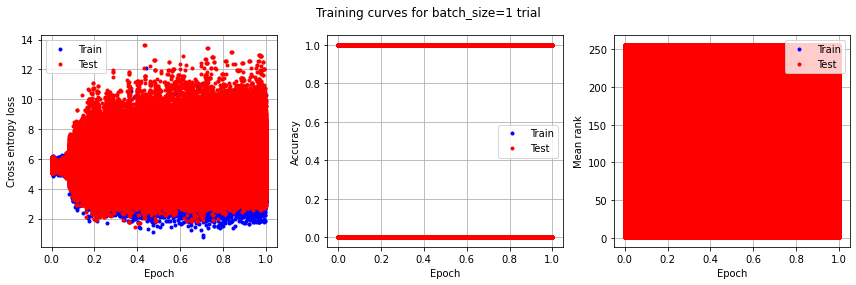







Starting new batch_size trial...
	Learning rate: 1e-05
	Weight decay: 0
	Dropout: 0.001
	Batch size: 2


 13%|█████████████████████▉                                                                                                                                                | 20/151 [30:04<3:24:49, 93.81s/it]

In [ ]:
default_lr = 1e-5
default_weight_decay = 0
default_dropout = 0
default_batch_size = 100
default_dataset_kwargs = {'transform': None, 'mixup': False, 'traces_per_sample': 1}

for hparam_name, values_to_try in hparams_to_sweep.items():
    best_min_rank = np.inf
    for value in values_to_try:
        min_rank = np.inf
        if hparam_name == 'learning_rate':
            learning_rate = value
        else:
            learning_rate = default_lr
        if hparam_name == 'weight_decay':
            weight_decay = value
        else:
            weight_decay = default_weight_decay
        if hparam_name == 'dropout':
            dropout = value
        else:
            dropout = default_dropout
        if hparam_name == 'batch_size':
            batch_size = value
        else:
            batch_size = default_batch_size
        if hparam_name == 'dataset_kwargs':
            dataset_kwargs = value
        else:
            dataset_kwargs = default_dataset_kwargs
        print('Starting new {} trial...'.format(hparam_name))
        print('\tLearning rate: {}'.format(learning_rate))
        print('\tWeight decay: {}'.format(weight_decay))
        print('\tDropout: {}'.format(dropout))
        print('\tBatch size: {}'.format(batch_size))
        traces_per_sample = dataset_kwargs['traces_per_sample']
        train_dataset = AscadDataset(train=True, **dataset_kwargs)
        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataset = AscadDataset(train=False, transform=RandomShift(max_shift_size=0), traces_per_sample=traces_per_sample)
        test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
        model = EffNetDS50((traces_per_sample, 700), (256,)).to(device) #resnet18(dropout=dropout).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        lr_scheduler = LRScheduler(optimizer, 1e-3, pct_start=0.2, cycle_momentum=False, epochs=epochs_per_trial, steps_per_epoch=len(train_dataloader))
        loss_fn = LossFn()
        
        def train_epoch(idx, train=True):
            if train:
                results = execute_epoch(train_step, train_dataloader,
                                        model, loss_fn, optimizer, device, callback=lr_scheduler.step)
            else:
                results = execute_epoch(eval_step, train_dataloader,
                                        model, loss_fn, device)
            with open(os.path.join(results_path, 'hparam_{}_val_{}__train_epoch_{}.pickle'.format(hparam_name, value, idx)), 'wb') as F:
                pickle.dump(results, F)
        def eval_epoch(idx):
            global min_rank
            results = execute_epoch(eval_step, test_dataloader,
                                    model, loss_fn, device)
            rank = np.mean(results['mean_rank'])
            if rank < min_rank:
                min_rank = rank
            with open(os.path.join(results_path, 'hparam_{}_val_{}__eval_epoch_{}.pickle'.format(hparam_name, value, idx)), 'wb') as F:
                pickle.dump(results, F)
        
        progress_bar = tqdm(total=epochs_per_trial+1)
        train_epoch(0, train=False)
        eval_epoch(0)
        progress_bar.update(1)
        for epoch in range(1, epochs_per_trial+1):
            train_epoch(epoch)
            eval_epoch(epoch)
            progress_bar.update(1)
        print('Done. Min rank: {}'.format(min_rank))
        
        if min_rank < best_min_rank:
            print('\tNew best min rank. Previous best: {}'.format(best_min_rank))
            best_min_rank = min_rank
            if hparam_name == 'learning_rate':
                default_lr = value
            elif hparam_name == 'weight_decay':
                default_weight_decay = value
            elif hparam_name == 'dropout':
                default_dropout = value
            elif hparam_name == 'batch_size':
                default_batch_size = value
            elif hparam_name == 'dataset_kwargs':
                default_dataset_kwargs = value
        
        fig, axes = plot_traces(results_path, 'hparam_{}_val_{}'.format(hparam_name, value), ['loss', 'acc', 'mean_rank'])
        axes[0].set_ylabel('Cross entropy loss')
        axes[1].set_ylabel('Accuracy')
        axes[2].set_ylabel('Mean rank')
        fig.suptitle('Training curves for {}={} trial'.format(hparam_name, value))
        plt.tight_layout()
        plt.show()
        print('\n\n\n\n\n')